# Nearest Neighbor Classification and Regression

The nearest neighbors (NN) or [k-nearest neighbors (kNN)] algorithm is a simple supervised machine learning algorithm that can be used to solve both classification and regression tasks. The kNN learning practically assumes that similar items exist in close proximity in the feature space. In other words, similar things are near to each other and the algorithm exploits this property. 

kNN algorithm starts by finding the distances between a query and all the examples in the traning dataset, and continues by selecting the specified number instances (*k*) closest to the query, then votes for the most frequent label (in the case of classification) or averages the target variable (in the case of regression).

To create kNN classifiers we will use `sklearn` library. 

In [1]:
#import utility libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Before we start, first load a toy dataset we will use for building these classifiers
from sklearn.datasets import load_iris
data = load_iris()
desc_features = data.feature_names
print(desc_features)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.head(20)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features], df['target'],  
                                                    test_size=0.40, random_state=0)

## Building a 1NN classifier
We will again make use of Scikit learn library (or `sklearn`) which implements a number of learning models. Similarity-based classifiers/regressors can be found under `sklearn.neighbors` module.

An general [tutorial](https://scikit-learn.org/stable/modules/neighbors.html) on nearest neighbor algorithms is also available from scikit-learn.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


nn_clf = KNeighborsClassifier(n_neighbors=1)
nn_clf.fit(X_train, Y_train)

y_pred = nn_clf.predict(X_test)
print('1NN accuracy score {:.3f}'.format(accuracy_score(y_pred, Y_test)) )

1NN accuracy score 0.917


### Normalizing data before using it
It is often a good idea to preprocess the data to normalize before using it in NN classification. We will use the MinMaxScaler in the following example and retrain our model using a 1NN classification model.

In [6]:
# It is often a good idea to preprocess the data to normalize before using it in 
from sklearn import preprocessing
scaled_df = preprocessing.MinMaxScaler().fit_transform(df)
sdf=pd.DataFrame(scaled_df, columns=df.columns)
sdf['target']=df['target']
sdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(sdf[desc_features], 
                                                    sdf['target'], test_size=0.40, random_state=0)
nn_clf = KNeighborsClassifier(n_neighbors=1)
nn_clf.fit(X_train, Y_train)

y_pred = nn_clf.predict(X_test)
print('1NN accuracy score (after normalization) {:.3f}'.format(accuracy_score(y_pred, Y_test)) )

1NN accuracy score (after normalization) 0.933


In [10]:
nn_clf = KNeighborsClassifier(n_neighbors=3)
nn_clf.fit(X_train, Y_train)

y_pred = nn_clf.predict(X_test)
print('3NN accuracy score {:.3f}'.format(accuracy_score(y_pred, Y_test)) )

3NN accuracy score 0.933


### NN Parameters
You can change the parameters of NN classifiers to change the settings. 
One of these settings is the distance `metric` (default is Minkowski distance with p=2, i.e., Euclidean distance). You can see a list of available metrics in [DistanceMetric submodule](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).
Another is the `weight`, which specifies the weight function used in prediction.

In [13]:
# here you can find a 5NN classifier with Chebyshev distance and distance-based weighting.
nn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
nn_clf.fit(X_train, Y_train)

y_pred = nn_clf.predict(X_test)
print('3NN accuracy score {:.3f}'.format(accuracy_score(y_pred, Y_test)) )

3NN accuracy score 0.917


### Picking the right k

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'k')]

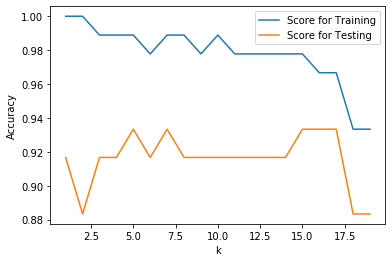

In [14]:
resultsKNN = pd.DataFrame(columns=['KNN', 'Score for Training', 'Score for Testing'])

for knnCount in range (1,20):
    knn = KNeighborsClassifier(n_neighbors=knnCount, p=1, metric='minkowski') #manhattan dist here
    knn.fit(X_train, Y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    scoreTrain = accuracy_score(Y_train, y_train_pred)
    scoreTest = accuracy_score(Y_test, y_pred)

    resultsKNN.loc[knnCount] = [knnCount, scoreTrain, scoreTest]
    
resultsKNN.pop('KNN')
ax = resultsKNN.plot()
ax.set(xlabel='k', ylabel='Accuracy')

## Regression with NN algorithms (for continuous target features)
We will use the `diabetes` dataset in this part and use a standard scaler.

In [15]:
from sklearn.datasets import load_diabetes
dia_data = load_diabetes()
dia_desc_feat = dia_data.feature_names
dia_data.keys()

print(dia_desc_feat)
dia_df = pd.DataFrame(dia_data.data, columns=dia_desc_feat)
dia_df['target'] = dia_data.target
dia_df.head()

from sklearn import preprocessing
scaled_df = preprocessing.StandardScaler().fit_transform(dia_df)
sdf=pd.DataFrame(scaled_df, columns=dia_df.columns)
sdf['target']=dia_df['target']
sdf.head()


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
nnr = KNeighborsRegressor(n_neighbors=2)

X_train, X_test, Y_train, Y_test = train_test_split(sdf[dia_desc_feat], sdf['target'],  
                                                    test_size=0.33, random_state=0)

nnr.fit(X_train, Y_train)
y_pred = nnr.predict(X_test)

print("MAE: {:.2f}".format( mean_absolute_error(Y_test, y_pred) ) )

print("RMSE: {:.2f}".format( np.sqrt( mean_squared_error(Y_test, y_pred) ) ) )

MAE: 55.18
RMSE: 71.36


[Text(0, 0.5, 'Mean Absolute Error'), Text(0.5, 0, '$k$')]

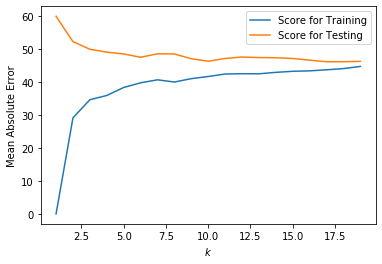

In [17]:
resultsKNN = pd.DataFrame(columns=['KNN', 'Score for Training', 'Score for Testing'])

for knnCount in range (1,20):
    knn = KNeighborsRegressor(n_neighbors=knnCount, p=1, metric='minkowski') #manhattan dist here
    knn.fit(X_train, Y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    scoreTrain = mean_absolute_error(Y_train, y_train_pred)
    scoreTest = mean_absolute_error(Y_test, y_pred)

    resultsKNN.loc[knnCount] = [knnCount, scoreTrain, scoreTest]
    
resultsKNN.pop('KNN')
ax = resultsKNN.plot()
ax.set(xlabel='$k$', ylabel='Mean Absolute Error')